In [32]:
import os # работа с папкой и файлами
import re # регулярные выражения, доп вариант к очистке
import string # работа со строкой

import pandas as pd # работа с таблицей dataframe

import nltk # работа с пакетами языков
from nltk import word_tokenize, ngrams # токенизация и деление на n граммы
from nltk.corpus import stopwords # стопслова, extend

from wordcloud import WordCloud # визуальное отображение
import pymorphy3 # работа с русским языком, pymorphy3

import matplotlib.pyplot as plt # визуальное отображение

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sorokin.m.e\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sorokin.m.e\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Список файлов в папке
FOLDER_NAME = 'data'

direct_list = os.listdir(FOLDER_NAME)
direct_list

['Ария - Возьми мое сердце.txt',
 'Григорий Лепс - Самый лучший день.txt',
 'Земляне - Земля в иллюминаторе.txt',
 'Кино - Пачка сигарет.txt',
 'Кипелов - Я Свободен.txt',
 'Король и Шут - Лесник.txt',
 'Любэ - Берёзы.txt',
 'Любэ - Ты неси меня река.txt',
 'Наутилус Помпилиус - Прогулки по воде.txt',
 'Руки Вверх - Крошка моя.txt']

In [34]:
# Имена песен из названия файлов
names = [song.replace(".txt", "") for song in direct_list]
names

['Ария - Возьми мое сердце',
 'Григорий Лепс - Самый лучший день',
 'Земляне - Земля в иллюминаторе',
 'Кино - Пачка сигарет',
 'Кипелов - Я Свободен',
 'Король и Шут - Лесник',
 'Любэ - Берёзы',
 'Любэ - Ты неси меня река',
 'Наутилус Помпилиус - Прогулки по воде',
 'Руки Вверх - Крошка моя']

In [35]:
# Функция чтения файла
def read_song(filename, folder=FOLDER_NAME):
  text = ''
  with open(f'{folder}/{filename}.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    text = text.replace('\n', ' ')
  return text

# Чтение данных из папки
songs_list = []

for song in names:
  songs_list.append(read_song(song))

songs_list

['Слепая ночь легла у ног И не пускает на порог. Брожу по дому как во сне, Но мне покоя нет нигде. Тупая боль пробьет висок, И пальцы лягут на курок, А в зеркалах качнется призрак, Призрак любви...  Возьми мое сердце, Возьми мою душу. Я так одинок в этот час, Что хочу умереть... Мне некуда деться, Свой мир я разрушил. По мне плачет только свеча, На холодной заре.  Ты умерла в дождливый день И тени плыли по воде Я смерть увидел в первый раз Ее величие и грязь В твоих глазах застыла боль, Я разделю ее с тобой. А в зеркалах качнется призрак, Призрак любви...  Возьми мое сердце, Возьми мою душу. Я так одинок в этот час, Что хочу умереть... Мне некуда деться, Свой мир я разрушил. По мне плачет только свеча, На холодной заре.  Я слышу утренний колокол - Он славит праздник, И сыпет медью и золотом. Ты теперь в царстве вечного сна.  Я слышу утренний колокол - Он бесов дразнит, И звоном небо расколото. На земле я любил лишь тебя...  Я слышу утренний колокол - Он славит праздник, И сыпет медью и

In [36]:
# Стоп-слова русского языка
stopwords_list = stopwords.words("russian")

# Собственные стоп-слова
extra_stop = ['твоей', 'свои', 'тобой', 'мой', 'твой', 'мой', 'это']
stopwords_list.extend(extra_stop)

len(stopwords_list)

158

In [37]:
# Очищение строк
def clean_string(text):
  string.punctuation += '—'
  text = re.split(' |:|\.|\(|\)|,|"|;|/|\n|\t|-|\?|\[|\]|!|…', text)
  text = ' '.join([word for word in text if word not in string.punctuation])
  text = text.lower()
  text = ' '.join([word for word in text.split() if word not in stopwords_list])
  return text

songs_list_сlean = [clean_string(song) for song in songs_list]
songs_list_сlean

['слепая ночь легла ног пускает порог брожу дому сне покоя нигде тупая боль пробьет висок пальцы лягут курок зеркалах качнется призрак призрак любви возьми мое сердце возьми мою душу одинок час хочу умереть некуда деться свой мир разрушил плачет свеча холодной заре умерла дождливый день тени плыли воде смерть увидел первый величие грязь твоих глазах застыла боль разделю зеркалах качнется призрак призрак любви возьми мое сердце возьми мою душу одинок час хочу умереть некуда деться свой мир разрушил плачет свеча холодной заре слышу утренний колокол славит праздник сыпет медью золотом царстве вечного сна слышу утренний колокол бесов дразнит звоном небо расколото земле любил лишь слышу утренний колокол славит праздник сыпет медью золотом царстве вечного сна слышу утренний колокол бесов дразнит звоном небо расколото земле любил лишь возьми мое сердце',
 'триста тысяч часов спиною триста тысяч планет мною устал создатель небе кружить каждый просыпаясь рассветом неспроста вспоминаешь очень зд

In [38]:
# Приводим слова к начальной форме
# py -m pip install pymorphy3-dicts-ru
morph = pymorphy3.MorphAnalyzer(lang='ru')

def normilize_word(text):
  words = text.split() # по пробелу разделить
  result_list = []
  for word in words:
    # print(morph.parse(word))
    normal_form = morph.parse(word)[0].normal_form
    result_list.append(normal_form)
    # print(normal_form)
  return " ".join(result_list)

songs_list_norm = [normilize_word(song) for song in songs_list_сlean]
songs_list_norm

['слепой ночь лечь нога пускать порог бродить дом сон покой нигде тупой боль пробить висок палец лечь курок зеркало качнуться призрак призрак любовь взять мой сердце взять мой душа одинокий час хотеть умереть некуда деться свой мир разрушить плакать свеча холодный заря умереть дождливый день тень плыть вода смерть увидеть первый величие грязь твой глаз застылый боль разделить зеркало качнуться призрак призрак любовь взять мой сердце взять мой душа одинокий час хотеть умереть некуда деться свой мир разрушить плакать свеча холодный заря слышать утренний колокол славить праздник сыпать медь золото царство вечный сон слышать утренний колокол бес дразнить звон небо расколоть земля любить лишь слышать утренний колокол славить праздник сыпать медь золото царство вечный сон слышать утренний колокол бес дразнить звон небо расколоть земля любить лишь взять мой сердце',
 'триста тысяча час спина триста тысяча планета я устать создатель небо кружить каждый просыпаться рассвет неспроста вспоминать 

In [39]:
# Имена и песни заносим во фрейм
df = pd.DataFrame({'name': names, 'song_text': songs_list_norm})
df.head()

,name,song_text
0,Ария - Возьми мое сердце,слепой ночь лечь нога пускать порог бродить до...
1,Григорий Лепс - Самый лучший день,триста тысяча час спина триста тысяча планета ...
2,Земляне - Земля в иллюминаторе,земля иллюминатор земля иллюминатор земля иллю...
3,Кино - Пачка сигарет,сидеть смотреть чужое небо чужое окно видеть о...
4,Кипелов - Я Свободен,я тишина небо полный дождь дождь пpоходить скв...


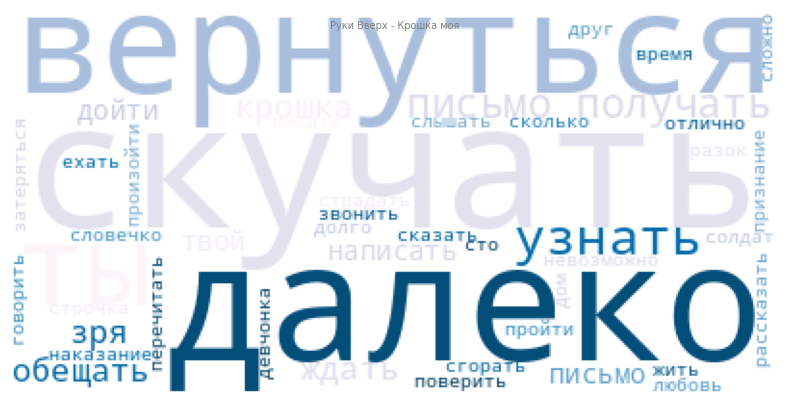

In [63]:
plt.rcParams["figure.figsize"] = (10,5) # размер графиков
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)
i = 1
for name, text in zip(df.name, df.song_text):
  # tokens = word_tokenize(df['song_text'][0])
  tokens = word_tokenize(text)
  text_raw = " ".join(tokens)
  # wordcloud = WordCloud(colormap='Accent', background_color='white', contour_width=10).generate(text_raw)
  wordcloud = WordCloud(colormap='PuBu', background_color='white', contour_width=10).generate(text_raw)
  # plt.subplot(4, 3, i, label=name, frame_on=True)
  plt.tick_params(labelsize=10)
  plt.imshow(wordcloud)
  plt.axis("off")
  # plt.title(df['name'][0], fontdict={'fontsize':7,'color':'grey'},y=0.93)
  plt.title(name, fontdict={'fontsize':7,'color':'grey'},y=0.93)
  plt.tick_params(labelsize=10)
  i += 1